In [45]:
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import pandas as pd
import numpy as np
import os


# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 적재

In [126]:
train_og = pd.read_csv("/content/drive/MyDrive/건설기계 오일 상태 분류 AI 경진대회/train.csv")
test = pd.read_csv("/content/drive/MyDrive/건설기계 오일 상태 분류 AI 경진대회/test.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/건설기계 오일 상태 분류 AI 경진대회/sample_submission.csv")

test = test.drop(["ID", "YEAR"], axis=1)
columns = test.columns 

train = pd.concat([train_og[columns], train_og["Y_LABEL"]], axis=1)
train

,COMPONENT_ARBITRARY,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,Y_LABEL
0,COMPONENT3,1486,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,COMPONENT2,1350,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0
2,COMPONENT2,2415,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
3,COMPONENT3,7389,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0
4,COMPONENT3,3954,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,COMPONENT3,1616,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16,0
14091,COMPONENT1,2784,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408,0
14092,COMPONENT3,1788,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301,0
14093,COMPONENT2,2498,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652,0


# 데이터 정보, 시각화

In [7]:
train.head(3)

,COMPONENT_ARBITRARY,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,Y_LABEL
0,COMPONENT3,1486,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,COMPONENT2,1350,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0
2,COMPONENT2,2415,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1


In [8]:
train.describe(include="all")

,COMPONENT_ARBITRARY,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,Y_LABEL
count,14095,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,COMPONENT3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3146.082937,387.416885,0.025825,0.028166,3.299468,34.560624,178.169280,0.033650,2.787939,23.992409,0.730117,415.159631,0.707911,0.050656,109.355815,588.646825,0.085349
std,NaN,4216.089809,550.016073,0.171926,0.314249,28.595510,128.958953,533.208976,0.809162,11.131836,59.833922,3.806716,1528.191012,6.897579,0.475438,49.612379,531.743393,0.279411
min,NaN,1000.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000,0.000000,0.000000
25%,NaN,1655.000000,200.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,71.800000,37.000000,0.000000
50%,NaN,2227.000000,200.000000,0.000000,0.000000,1.000000,4.000000,41.000000,0.000000,1.000000,1.000000,0.000000,29.000000,0.000000,0.000000,111.300000,520.000000,0.000000
75%,NaN,3797.000000,410.000000,0.000000,0.000000,3.000000,17.000000,139.000000,0.000000,2.000000,7.000000,0.000000,181.000000,0.000000,0.000000,137.200000,1119.000000,0.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMPONENT_ARBITRARY  14095 non-null  object 
 1   ANONYMOUS_1          14095 non-null  int64  
 2   ANONYMOUS_2          14095 non-null  int64  
 3   AG                   14095 non-null  int64  
 4   CO                   14095 non-null  int64  
 5   CR                   14095 non-null  int64  
 6   CU                   14095 non-null  int64  
 7   FE                   14095 non-null  int64  
 8   H2O                  14095 non-null  float64
 9   MN                   14095 non-null  int64  
 10  MO                   14095 non-null  int64  
 11  NI                   14095 non-null  int64  
 12  PQINDEX              14095 non-null  int64  
 13  TI                   14095 non-null  int64  
 14  V                    14095 non-null  int64  
 15  V40                  14095 non-null 

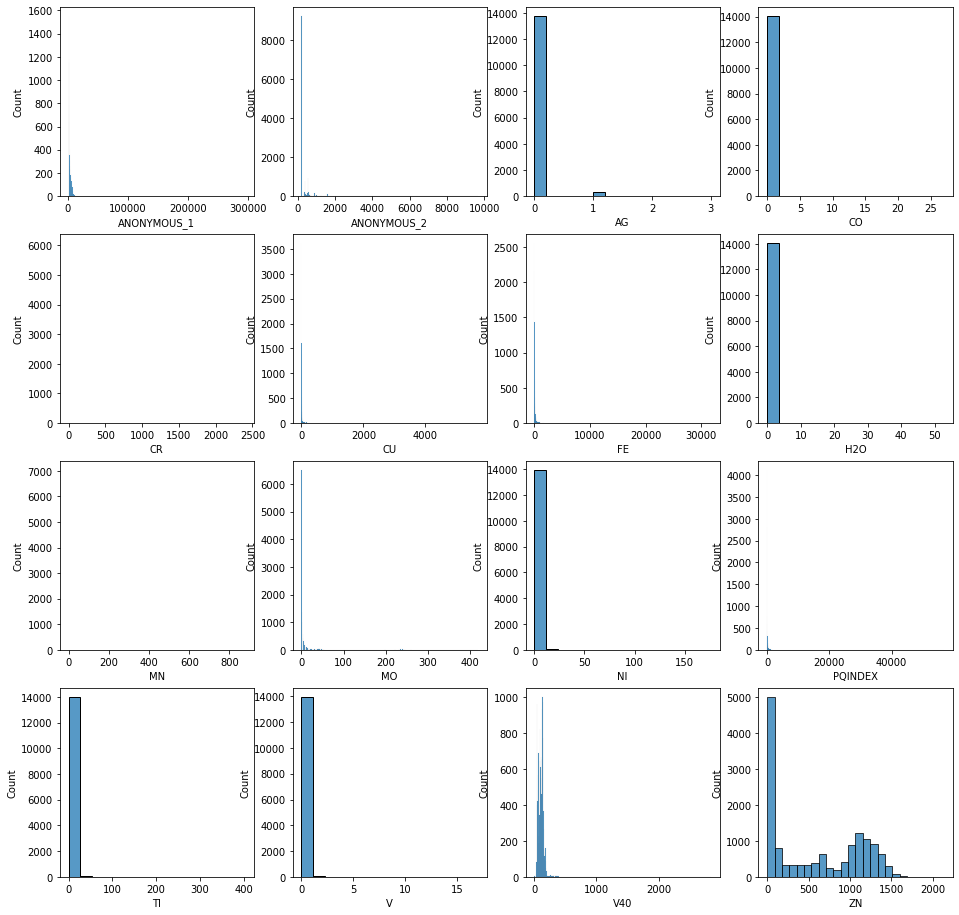

In [11]:
numerical_columns = train.select_dtypes(exclude='object').columns.tolist()

def show_plot(df, columns):
    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16,16))
    for i, column in enumerate(columns[:-1]):
        row = int(i/4)
        col = i%4
    
        sns.histplot(df[column], ax=axs[row][col])

show_plot(train, numerical_columns)

# 데이터 전처리

## one-hot encoding

In [107]:
train = pd.get_dummies(train, columns = ['COMPONENT_ARBITRARY'])
train.head(4)

,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,...,PQINDEX,TI,V,V40,ZN,Y_LABEL,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
0,1486,200,0,0,13,78,888,0.0,16,1,...,8504,5,0,154.0,75,0,0,0,1,0
1,1350,375,0,0,0,31,2,0.0,0,0,...,19,0,0,44.0,652,0,0,1,0,0
2,2415,200,0,0,1,2,4,0.0,0,0,...,17,0,0,72.6,412,1,0,1,0,0
3,7389,200,0,0,0,1,37,0.0,1,0,...,44,0,0,133.3,7,0,0,0,1,0


## 이상치 제거

In [108]:
# 이상치 제거
# 이상치 = Q3 + threshold * IQR 
# 이상치가 너무 많음

'''
threshold를 기준으로 하니까 너무 데이터가 많이 삭제됨. 그래서 고정적으로 n개를 삭제하는 함수를 만들기로 결정함 
'''

# def drop_outlier(df, threshold=1.5):
#     print(df.shape)
#     describe = df.describe()
#     cols = df.columns[0, 2,]
#     for col in df.columns[:-4]:
#         IQR = describe.loc["75%",col] - describe.loc["25%", col]
#         outlier = describe.loc["75%",col] + IQR * threshold
#         outlier_data = df[df[col]>outlier].index
#         print("{}에서의 outlier 데이터 개수: {}".format(col, len(outlier_data)))
#         df = df.drop(df[df[col]>outlier].index, axis=0)
#     print(df.shape)
#     return df

'\nthreshold를 기준으로 하니까 너무 데이터가 많이 삭제됨. 그래서 고정적으로 n개를 삭제하는 함수를 만들기로 결정함 \n'

In [109]:
def drop_outlier(df, n=50):
    print("원래 데이터 크기: ",df.shape)
    outlier = pd.DataFrame()
    # 원핫 인코딩 된 컬럼은 이상치 제거 하지 않음.
    for col in df.columns[:-5]:
        top_n = df.sort_values(by=col, ascending=False)[:n]
        outlier = outlier.append(top_n)
        top_n = top_n.index
        df = df.drop(top_n, axis=0)
    print("이상치 제거 후 데이터 크기: ",df.shape)
    return  outlier, df
outlier, train = drop_outlier(train) 

원래 데이터 크기:  (14095, 21)
이상치 제거 후 데이터 크기:  (13295, 21)


In [110]:
train_X = train.drop(["Y_LABEL"], axis=1)
train_y = train.Y_LABEL

In [111]:
train_X

,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
0,1486,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0,0,1,0
1,1350,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0,1,0,0
2,2415,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,0,1,0,0
3,7389,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0,0,1,0
4,3954,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,1616,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16,0,0,1,0
14091,2784,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408,1,0,0,0
14092,1788,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301,0,0,1,0
14093,2498,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652,0,1,0,0


In [112]:
outlier_X = outlier.drop(["Y_LABEL"], axis=1)
outlier_y = outlier.Y_LABEL 

outlier_X

,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
5970,294451,200,0,0,0,0,123,0.0,1,0,0,513,0,0,141.3,16,0,0,1,0
13469,123788,6654,0,0,1,0,92,0.0,0,2,0,93,0,0,124.3,74,0,0,1,0
3876,89350,200,0,0,0,63,34,0.0,1,4,0,33,0,0,140.0,58,0,0,1,0
8511,78418,200,0,0,3,11,28,0.0,0,0,0,24,0,0,59.1,372,0,1,0,0
212,78418,200,0,0,0,1,17,0.0,0,0,0,16,0,0,134.0,35,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13793,1363,563,0,0,3,9,208,0.0,4,6,0,255,0,0,69.9,1574,0,0,1,0
1507,4086,200,0,0,1,2,7,0.0,0,250,0,14,0,0,112.5,1572,1,0,0,0
11997,1681,550,0,0,2,5,211,0.0,4,6,0,781,0,0,70.2,1572,0,0,1,0
1857,5412,471,0,0,0,2,46,0.0,0,0,0,78,0,0,111.3,1569,0,0,1,0


In [113]:
train_X.describe()

,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
count,13295.000000,13295.000000,13295.000000,13295.00000,13295.000000,13295.000000,13295.000000,13295.000000,13295.000000,13295.000000,13295.000000,13295.000000,13295.000000,13295.000000,13295.000000,13295.000000,13295.000000,13295.000000,13295.000000,13295.000000
mean,2961.117262,364.233622,0.019857,0.01384,1.941106,27.434299,128.495374,0.004332,1.873336,23.051598,0.404287,286.791350,0.234675,0.015570,107.261264,591.319594,0.282211,0.171267,0.486348,0.060173
std,1958.836706,374.899944,0.139514,0.11683,3.545264,65.413882,252.768326,0.041856,4.023819,57.778814,1.178513,902.657266,1.256959,0.123808,39.968178,526.669269,0.450093,0.376757,0.499832,0.237816
min,1000.000000,200.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1650.000000,200.000000,0.000000,0.00000,0.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,71.100000,38.000000,0.000000,0.000000,0.000000,0.000000
50%,2208.000000,200.000000,0.000000,0.00000,1.000000,4.000000,39.000000,0.000000,0.000000,1.000000,0.000000,26.000000,0.000000,0.000000,109.800000,545.000000,0.000000,0.000000,0.000000,0.000000
75%,3755.000000,407.000000,0.000000,0.00000,2.000000,16.000000,125.000000,0.000000,2.000000,7.000000,0.000000,154.000000,0.000000,0.000000,136.500000,1118.000000,1.000000,0.000000,1.000000,0.000000
max,15000.000000,5422.000000,1.000000,1.00000,56.000000,615.000000,2596.000000,0.900000,48.000000,272.000000,12.000000,11021.000000,21.000000,1.000000,313.900000,1568.000000,1.000000,1.000000,1.000000,1.000000


## 정규화 하기

In [114]:
# 원핫인코딩된 컬럼을 제외하고 표준화 함(이상치 데이터는 정규화 하지 않는다).
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
standardized_train_X = pd.DataFrame(scaler.fit_transform(train_X.iloc[:, :-4]), columns = train_X.columns[:-4])


change_index = {}
for x, y in zip(standardized_train_X.index, train_X.index):
    change_index[x] = y

standardized_train_X = standardized_train_X.rename(change_index)
standardized_train_X = pd.concat([standardized_train_X, train_X.iloc[:, -4:]], axis=1)
standardized_train_X

,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
0,-0.753086,-0.438090,-0.142335,-0.118465,3.119461,0.773041,3.004859,-0.103512,3.510893,-0.381670,4.748290,9.103696,3.791295,-0.125762,1.169443,-0.980386,0,0,1,0
1,-0.822518,0.028719,-0.142335,-0.118465,-0.547541,0.054512,-0.500459,-0.103512,-0.465579,-0.398978,-0.343061,-0.296681,-0.186707,-0.125762,-1.582850,0.115220,0,1,0,0
2,-0.278807,-0.438090,-0.142335,-0.118465,-0.265464,-0.388836,-0.492546,-0.103512,-0.465579,-0.398978,-0.343061,-0.298897,-0.186707,-0.125762,-0.867254,-0.340491,0,1,0,0
3,2.260550,-0.438090,-0.142335,-0.118465,-0.547541,-0.404124,-0.361987,-0.103512,-0.217050,-0.398978,-0.343061,-0.268984,-0.186707,-0.125762,0.651511,-1.109504,0,0,1,0
4,0.506893,-0.438090,-0.142335,-0.118465,-0.547541,-0.419411,-0.227471,-0.103512,-0.465579,-0.398978,-0.343061,-0.077321,-0.186707,-0.125762,0.646507,-0.879749,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,-0.686718,-0.438090,-0.142335,-0.118465,-0.547541,-0.373548,-0.417376,-0.103512,-0.465579,-0.398978,-0.343061,-0.278955,-0.186707,-0.125762,0.704055,-1.092415,0,0,1,0
14091,-0.090423,-0.438090,-0.142335,-0.118465,-0.547541,-0.388836,-0.460895,-0.103512,-0.465579,3.478022,-0.343061,-0.307760,-0.186707,-0.125762,0.256182,1.550710,1,0,0,0
14092,-0.598907,0.495528,-0.142335,-0.118465,0.580767,-0.312396,1.133510,-0.103512,1.274127,-0.225897,0.505497,0.396853,-0.186707,-0.125762,-1.332642,1.347538,0,0,1,0
14093,-0.236434,0.495528,-0.142335,-0.118465,-0.547541,2.179523,-0.433201,-0.103512,-0.465579,-0.381670,-0.343061,-0.305544,-0.186707,-0.125762,-1.575344,0.115220,0,1,0,0


In [115]:
standardized_train_X.isnull().sum()

ANONYMOUS_1                       0
ANONYMOUS_2                       0
AG                                0
CO                                0
CR                                0
CU                                0
FE                                0
H2O                               0
MN                                0
MO                                0
NI                                0
PQINDEX                           0
TI                                0
V                                 0
V40                               0
ZN                                0
COMPONENT_ARBITRARY_COMPONENT1    0
COMPONENT_ARBITRARY_COMPONENT2    0
COMPONENT_ARBITRARY_COMPONENT3    0
COMPONENT_ARBITRARY_COMPONENT4    0
dtype: int64

# 데이터셋 분류하기

In [116]:
# train_X, standardized_train_X, train_y, outlier_X, outlier_y
print("train_X shape: ", train_X.shape)
print("standardized_train_X shape: ", standardized_train_X.shape)
print("train_y shape: ", train_y.shape)
print("outlier_X shape: ", outlier_X.shape)
print("outlier_y shape: ", outlier_y.shape)

train_X shape:  (13295, 20)
standardized_train_X shape:  (13295, 20)
train_y shape:  (13295,)
outlier_X shape:  (800, 20)
outlier_y shape:  (800,)


## 검증셋 나누기

In [117]:
train_X, valid_X = train_X.iloc[2000:, :], train_X.iloc[:2000, :]
standardized_train_X , standardized_valid_X = standardized_train_X.iloc[2000:, :], standardized_train_X.iloc[:2000, :]
train_y, valid_y = train_y.iloc[2000:], train_y.iloc[:2000]
outlier_train_X, outlier_valid_X = outlier_X.iloc[150:, :], outlier_X.iloc[:150, :]
outlier_train_y, outlier_valid_y = outlier_y.iloc[150:], outlier_y.iloc[:150]

print("train_X shape: ", train_X.shape)
print("valid_X shape: ", valid_X.shape)
print("standardized_train_X shape: ", standardized_train_X.shape)
print("standardized_valid_X shape: ", standardized_valid_X.shape)
print("train_y shape: ", train_y.shape)
print("valid_y shape: ", valid_y.shape)
print("outlier_train_X shape: ", outlier_train_X.shape)
print("outlier_valid_X shape: ", outlier_valid_X.shape)
print("outlier_train_y shape: ", outlier_train_y.shape)
print("outlier_valid_y shape: ", outlier_valid_y.shape)

train_X shape:  (11295, 20)
valid_X shape:  (2000, 20)
standardized_train_X shape:  (11295, 20)
standardized_valid_X shape:  (2000, 20)
train_y shape:  (11295,)
valid_y shape:  (2000,)
outlier_train_X shape:  (650, 20)
outlier_valid_X shape:  (150, 20)
outlier_train_y shape:  (650,)
outlier_valid_y shape:  (150,)


# 모델



## 1. 이상치 데이터를 따로 학습하는 모델

### 이상치가 아닌 데이터를 학습하는 모델

In [118]:
tf.random.set_seed(42)
np.random.seed(42)

# 모델 1 훈련
normal_model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])

In [119]:
# 조기종료를 수행하게 해주는 콜백
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
callbacks = [early_stopping_cb]

normal_model.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])
normal_model.fit(standardized_train_X, train_y, epochs=40,
                    validation_data=(standardized_valid_X, valid_y), callbacks = callbacks)

Epoch 1/40
353/353 [==============================] - 5s 5ms/step - loss: 0.7776 - accuracy: 0.5928 - val_loss: 0.6715 - val_accuracy: 0.6650
Epoch 2/40
353/353 [==============================] - 2s 4ms/step - loss: 0.6051 - accuracy: 0.7398 - val_loss: 0.5553 - val_accuracy: 0.7925
Epoch 3/40
353/353 [==============================] - 2s 4ms/step - loss: 0.5044 - accuracy: 0.8233 - val_loss: 0.4741 - val_accuracy: 0.8605
Epoch 4/40
353/353 [==============================] - 2s 4ms/step - loss: 0.4454 - accuracy: 0.8613 - val_loss: 0.4222 - val_accuracy: 0.8880
Epoch 5/40
353/353 [==============================] - 2s 5ms/step - loss: 0.3991 - accuracy: 0.8834 - val_loss: 0.3889 - val_accuracy: 0.9025
Epoch 6/40
353/353 [==============================] - 2s 4ms/step - loss: 0.3734 - accuracy: 0.8940 - val_loss: 0.3643 - val_accuracy: 0.9070
Epoch 7/40
353/353 [==============================] - 2s 4ms/step - loss: 0.3539 - accuracy: 0.9012 - val_loss: 0.3477 - val_accuracy: 0.9100
Epoch 

### 이상치 데이터를 학습하는 모델

In [120]:
tf.random.set_seed(42)
np.random.seed(42)

# 모델 1 훈련
outlier_model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])

In [122]:
outlier_model.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

# 조기종료를 수행하게 해주는 콜백
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
callbacks = [early_stopping_cb]

outlier_model.fit(outlier_train_X, outlier_train_y, epochs=80, 
            validation_data=(outlier_valid_X, outlier_valid_y), callbacks = callbacks)

Epoch 1/80
21/21 [==============================] - 1s 14ms/step - loss: 0.4869 - accuracy: 0.8323 - val_loss: 0.7119 - val_accuracy: 0.7467
Epoch 2/80
21/21 [==============================] - 0s 7ms/step - loss: 0.4958 - accuracy: 0.8215 - val_loss: 0.6978 - val_accuracy: 0.7533
Epoch 3/80
21/21 [==============================] - 0s 5ms/step - loss: 0.4852 - accuracy: 0.8308 - val_loss: 0.6779 - val_accuracy: 0.7667
Epoch 4/80
21/21 [==============================] - 0s 6ms/step - loss: 0.4785 - accuracy: 0.8462 - val_loss: 0.6787 - val_accuracy: 0.7733
Epoch 5/80
21/21 [==============================] - 0s 5ms/step - loss: 0.4766 - accuracy: 0.8400 - val_loss: 0.6892 - val_accuracy: 0.7667
Epoch 6/80
21/21 [==============================] - 0s 5ms/step - loss: 0.4758 - accuracy: 0.8262 - val_loss: 0.6715 - val_accuracy: 0.7800
Epoch 7/80
21/21 [==============================] - 0s 5ms/step - loss: 0.4721 - accuracy: 0.8462 - val_loss: 0.6464 - val_accuracy: 0.7867
Epoch 8/80
21/21 [=

# test 데이터 전처리

In [136]:
def test_preprocessing(df):
    df = pd.get_dummies(df, columns = ['COMPONENT_ARBITRARY'])
    outlier, data = drop_outlier(df) 
    from sklearn import preprocessing

    scaler = preprocessing.StandardScaler()
    standardized_data = pd.DataFrame(scaler.fit_transform(data.iloc[:, :-4]), columns = data.columns[:-4])

    change_index = {}
    for x, y in zip(standardized_data.index, data.index):
        change_index[x] = y



    standardized_data = standardized_data.rename(change_index)
    standardized_data = pd.concat([standardized_data, data.iloc[:, -4:]], axis=1)


    print("\ntest_X shape", data.shape)
    print("standardized_test_X shape", standardized_data.shape)
    print("outlier_test_X shape", outlier.shape)
    return data, standardized_data, outlier

In [137]:
test_X, standardized_test_X, outlier_test_X = test_preprocessing(test)

원래 데이터 크기:  (6041, 20)
이상치 제거 후 데이터 크기:  (5291, 20)

test_X shape (5291, 20)
standardized_test_X shape (5291, 20)
outlier_test_X shape (750, 20)


# 모델 예측 / csv파일 저장

## 1. 이상치 데이터를 따로 학습하는 모델


In [170]:
submission_normal_outlier_01 = pd.DataFrame(sample_submission)

In [171]:
normal_predict = normal_model.predict(standardized_test_X)
outlier_predict = outlier_model.predict(outlier_test_X)

24/24 [==============================] - 0s 2ms/step


In [172]:
normal_index = standardized_test_X.index
outlier_index = outlier_test_X.index

for n, index in enumerate(normal_index):
    submission_normal_outlier_01.iloc[index, 1] = float(normal_predict[n])

for m, index in enumerate(outlier_index):
    submission_normal_outlier_01.iloc[index, 1] = float(outlier_predict[m])

In [173]:
for i in range(submission_normal_outlier_01.shape[0]):
    if submission_normal_outlier_01.iloc[i, 1] >= 0.5:   
        submission_normal_outlier_01.iloc[i,1] = 1 
    else:
        submission_normal_outlier_01.iloc[i,1] = 0

In [174]:
submission_normal_outlier_01.to_csv("C:\Users\user\Desktop\machine_learning\machine-learning\dacon\submission_normal_outlier_01")

SyntaxError: ignored

In [223]:
def save_predict_outlier(n):
    submission = pd.DataFrame(sample_submission)

    normal_predict = normal_model.predict(standardized_test_X)
    outlier_predict = outlier_model.predict(outlier_test_X)

    normal_index = standardized_test_X.index
    outlier_index = outlier_test_X.index

    for n, index in enumerate(normal_index):
        submission.iloc[index, 1] = float(normal_predict[n])

    for m, index in enumerate(outlier_index):
        submission.iloc[index, 1] = float(outlier_predict[m])

    for i in range(submission.shape[0]):
        if submission.iloc[i, 1] >= 0.5:   
            submission.iloc[i,1] = 1 
        else:
            submission.iloc[i,1] = 0
    
    submission.to_csv("/content/drive/MyDrive/건설기계 오일 상태 분류 AI 경진대회/predict/outlier_normal_{}".format(n))

In [225]:
save_predict_outlier("01")

24/24 [==============================] - 0s 2ms/step


In [226]:
("/content/drive/MyDrive/건설기계 오일 상태 분류 AI 경진대회/predict/outlier_normal_{}".format("01"))

'/content/drive/MyDrive/건설기계 오일 상태 분류 AI 경진대회/predict/outlier_normal_01'